In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv("iris.data",names=["Sepal Length", "Sepal Width","Petal Length" ,"Petal Width", "Class Label"])

In [3]:
data_orig = data

In [4]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class Label   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class Label   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isna().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class Label     0
dtype: int64

In [10]:
data = data.drop_duplicates(keep='first')

In [11]:
data.shape

(147, 5)

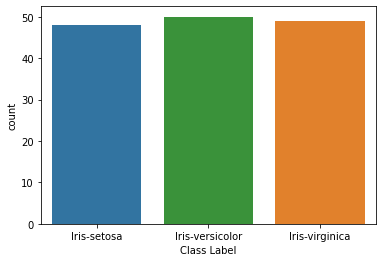

In [12]:
ax = sns.countplot(x = data['Class Label'],label="Count",palette = ['tab:blue', 'tab:green', 'tab:orange']
)


In [13]:
y = data["Class Label"] 
x = data.drop("Class Label",axis = 1 )

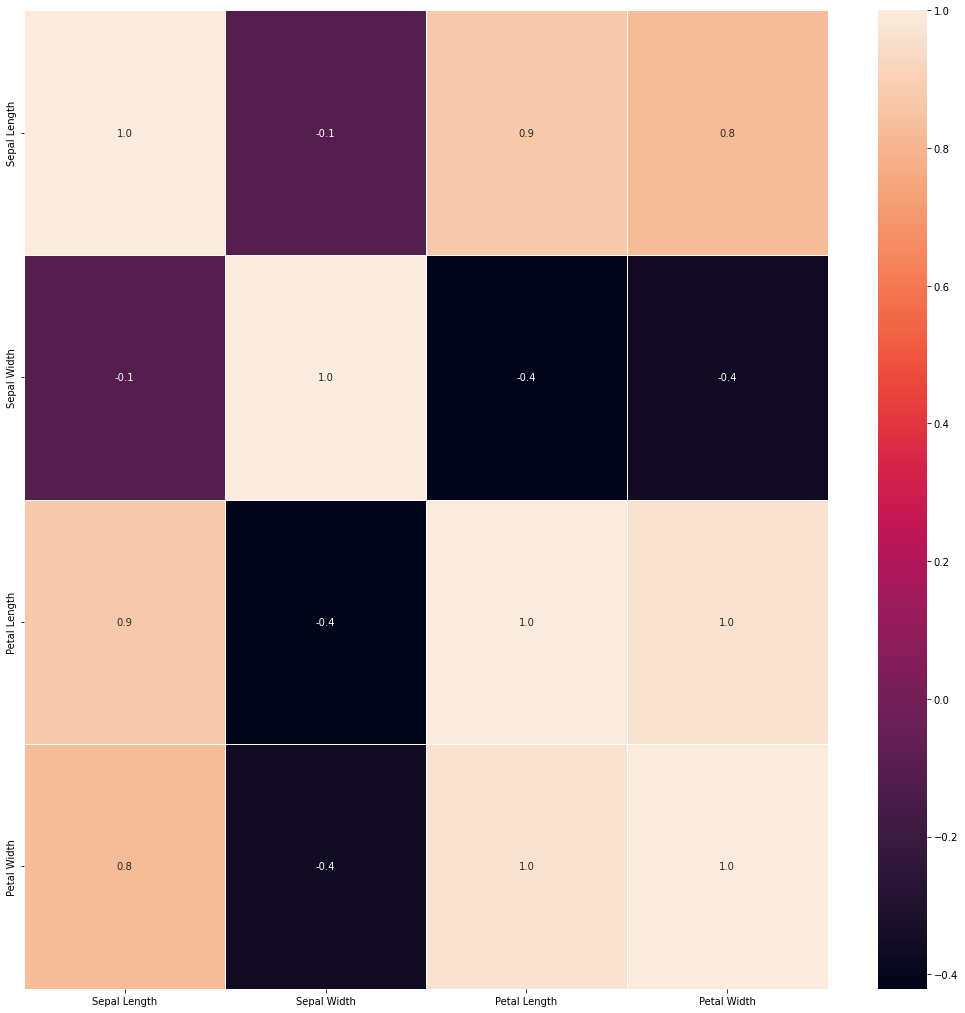

In [14]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

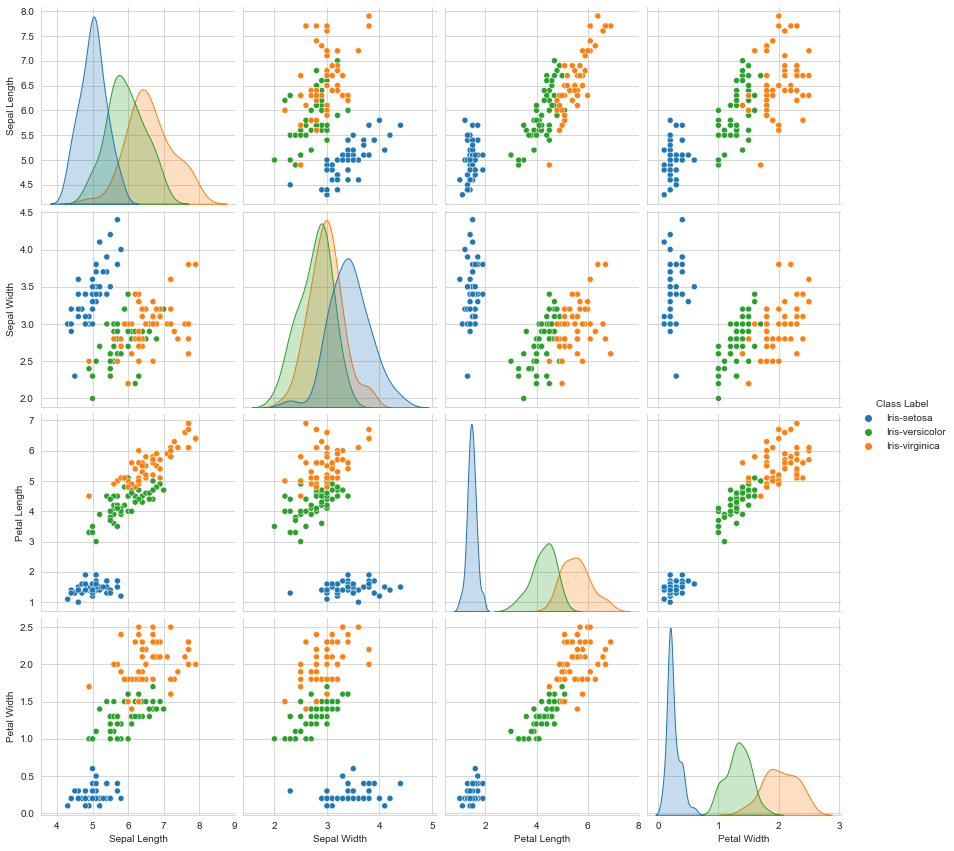

In [15]:
sns.set_style("whitegrid");
sns.pairplot(data,hue="Class Label",height=3,palette = ['tab:blue', 'tab:green', 'tab:orange']);


In [16]:
from sklearn.preprocessing import StandardScaler
features = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['Class Label']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
              ,columns = ['1', '2'])

In [18]:
principalDf.head()

,1,2
0,-2.291654,0.486576
1,-2.115428,-0.666015
2,-2.396070,-0.332493
3,-2.332435,-0.587708
4,-2.415395,0.653930


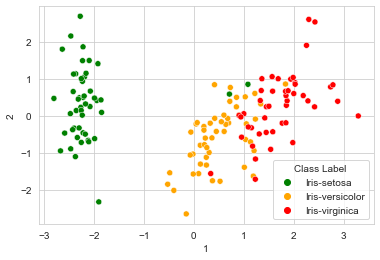

In [19]:
sns.scatterplot(x = principalDf["1"],y = principalDf["2"],hue=data["Class Label"],palette=['green','orange','red']);


In [20]:
data.loc[data['Class Label']=="Iris-setosa","Class Label"]=1
data.loc[data['Class Label']=="Iris-versicolor","Class Label"]=2
data.loc[data['Class Label']=="Iris-virginica","Class Label"]=3

C:\Users\Saransh Sharma\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
